In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
#WRITE FUNCTION 3
#run third
#----- df = a_data or j_data
#----- user = UN from assigned_to (optional- if not defined will return cost for all employees)
#----- rate = hourly wage. Default $40 for USA
def get_cost(df, user=None, rate=40):
  #Convert to Staffing Schedule
  df_tmp = df[['bus_dur_num', 'sys_mod_count', 'assigned_to']]
  tech_cost = {}

  if user==None:
    user_list = np.unique(df_tmp['assigned_to'].astype(str))

    for us in user_list:
      df_tmp2 = df_tmp[df_tmp['assigned_to']==us]
      dur = (df_tmp2['bus_dur_num'].mean()/60/60)
      count = len(df_tmp2)
      sys = df_tmp2['sys_mod_count'].mean()

      cost = ((((dur/sys)*count)/8)*rate)
      
      tech_cost[us] = cost

  else:
    df_tmp = df_tmp[df_tmp['assigned_to']==user]
    dur = (df_tmp['bus_dur_num'].mean()/60/60)
    count = len(df_tmp)
    sys = df_tmp['sys_mod_count'].mean()

    cost = ((((dur/sys)*count)/8)*rate)
    
    tech_cost[user] = cost
  

  return tech_cost

In [ ]:
# A Data

a_Data = pd.read_csv('/content/gdrive/Shared drives/IST 718 Project/a_cleaned.csv')
a_Data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration
0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional ...,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional ...,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57
1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail ...,10-27-2020 12:22:04 - Kaveri S (Additional com...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nm...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional com...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04
2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license ...,10-27-2020 02:58:38 - Sakshi Srivastava (Addit...,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (addit...,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00
3,6,6,6,I-ACM-CTS-India,INC1497739,Cancelled,P4,user not able to login remotely / ritm0955755,ritm0955755 - user did not receive any email \...,10-26-2020 14:45:06 - Isha Arora (Additional c...,10-26-2020 14:44:54 - Isha Arora (Work notes)\...,NaN,cacgy01 - calgary - 240-6025 11 street se,2020-10-26 14:44:00,2020-10-26 14:45:00,False,4216,4216,0,1,Sanchaita Biswas,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-26 14:45:00,9.0,2,10/26/2020 14:45,2020-10-26 13:34:00,False,10-26-2020 14:45:06 - isha arora (additional c...,NaN,los angeles,UNKNOWN,Not Yet Requested,calgary,3 - Low,False,NaN,canada,CA-GNCAP691-0240/BLDG,ab,midwest(amer),workstation/ computer - software,windows 10,NaN,NaN,False,False,NaN,NaN,NaN,0 days 01:11:00,1:10:16,1:10:16
4,8,9,9,I-ACM-SD L1-India,INC1497518,Cancelled,P4,asta powerproject licence has expired/not work...,NaN,10-26-2020 11:09:09 - Manohar Oberoi (Addition...,NaN,NaN,cambridge,2020-10-26 11:09:00,2020-10-26 11:09:00,False,0,57,0,1,Manohar Oberoi,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-26 11:09:00,9.0,2,10/26/2020 11:09,2020-10-26 11:08:00,False,10-26-2020 11:09:09 - manohar oberoi (addition...,NaN,los angeles,UNKNOWN,Not Yet Requested,cambridge,3 - Low,False,NaN,uk,NaN,NaN,NaN,software,software br

In [ ]:
a_Data['assigned_to'].nunique()

200

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


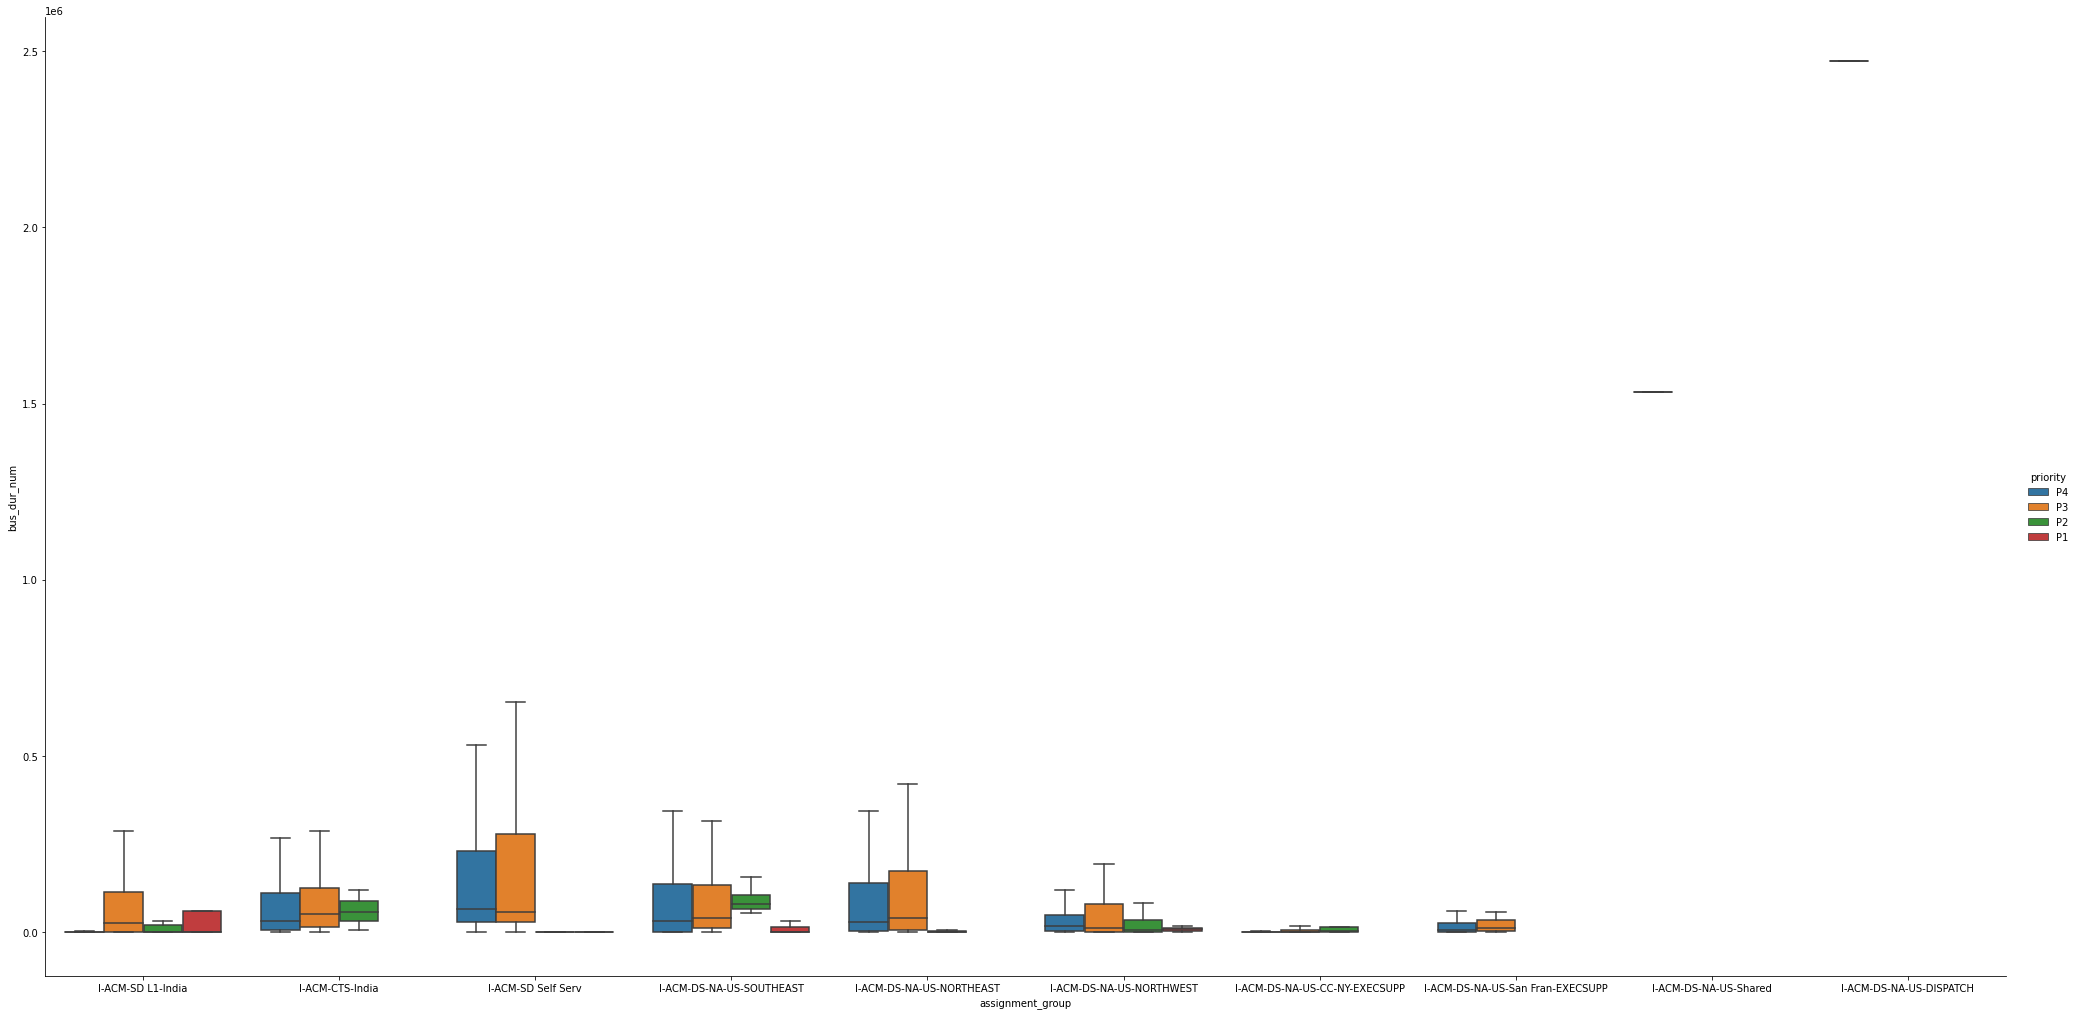

In [ ]:
# By priority
sns.catplot(x="assignment_group", y="bus_dur_num", hue="priority", kind="box", data=a_Data, size=14, aspect=2, showfliers=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


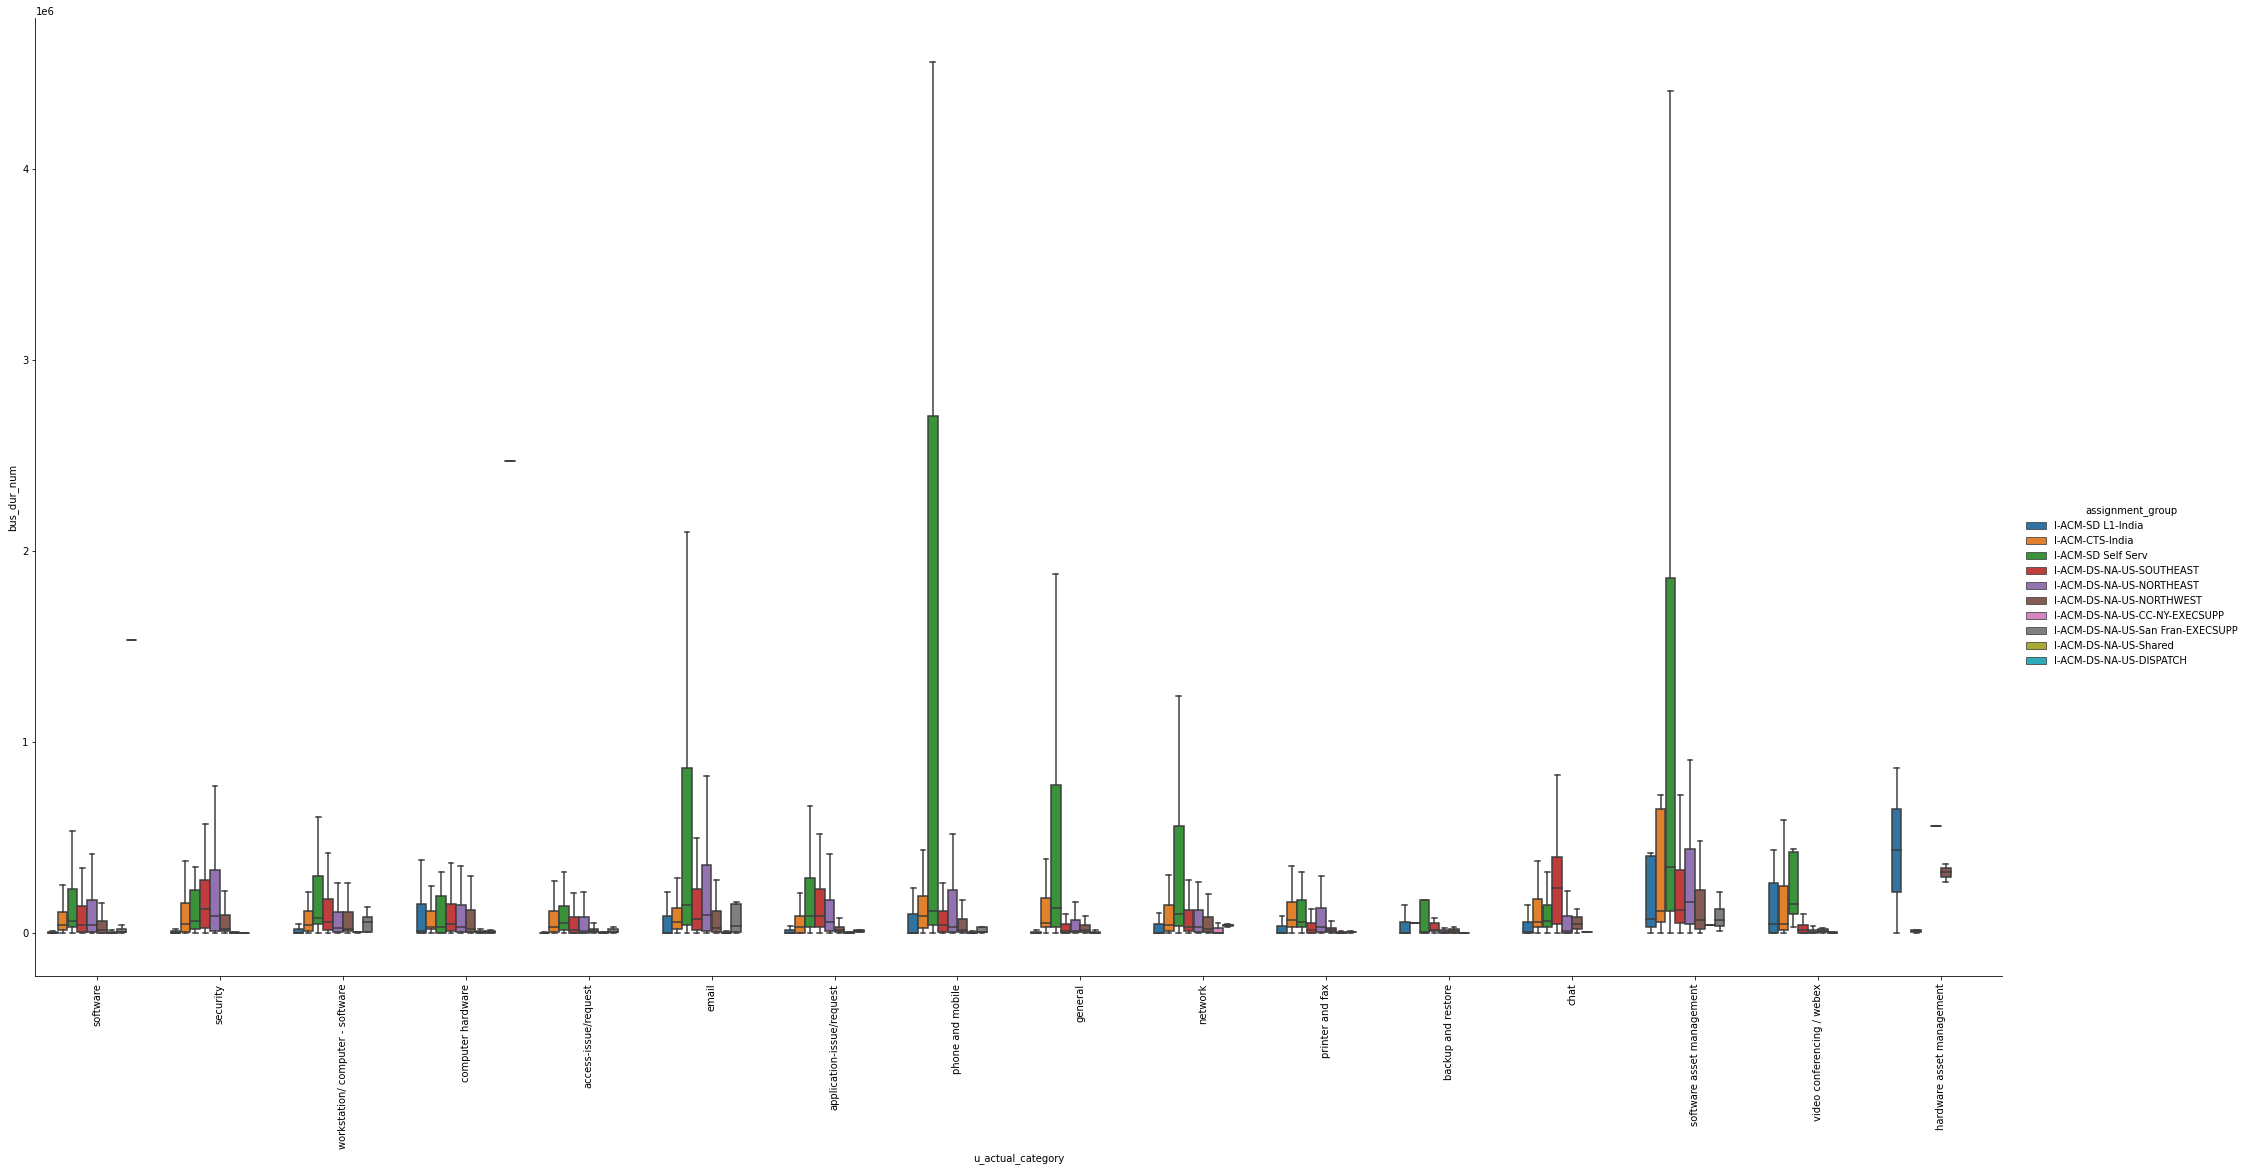

In [ ]:
# By ticket type
cag = sns.catplot(x="u_actual_category", y="bus_dur_num", hue="assignment_group", kind="box", data=a_Data, size=14, aspect = 2, showfliers=False)
cag.set_xticklabels(rotation=90)

In [ ]:
# By subcategory
#sns.catplot(x="assignment_group", y="bus_dur_num", hue="u_actual_subcategory", kind="box", data=a_Data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


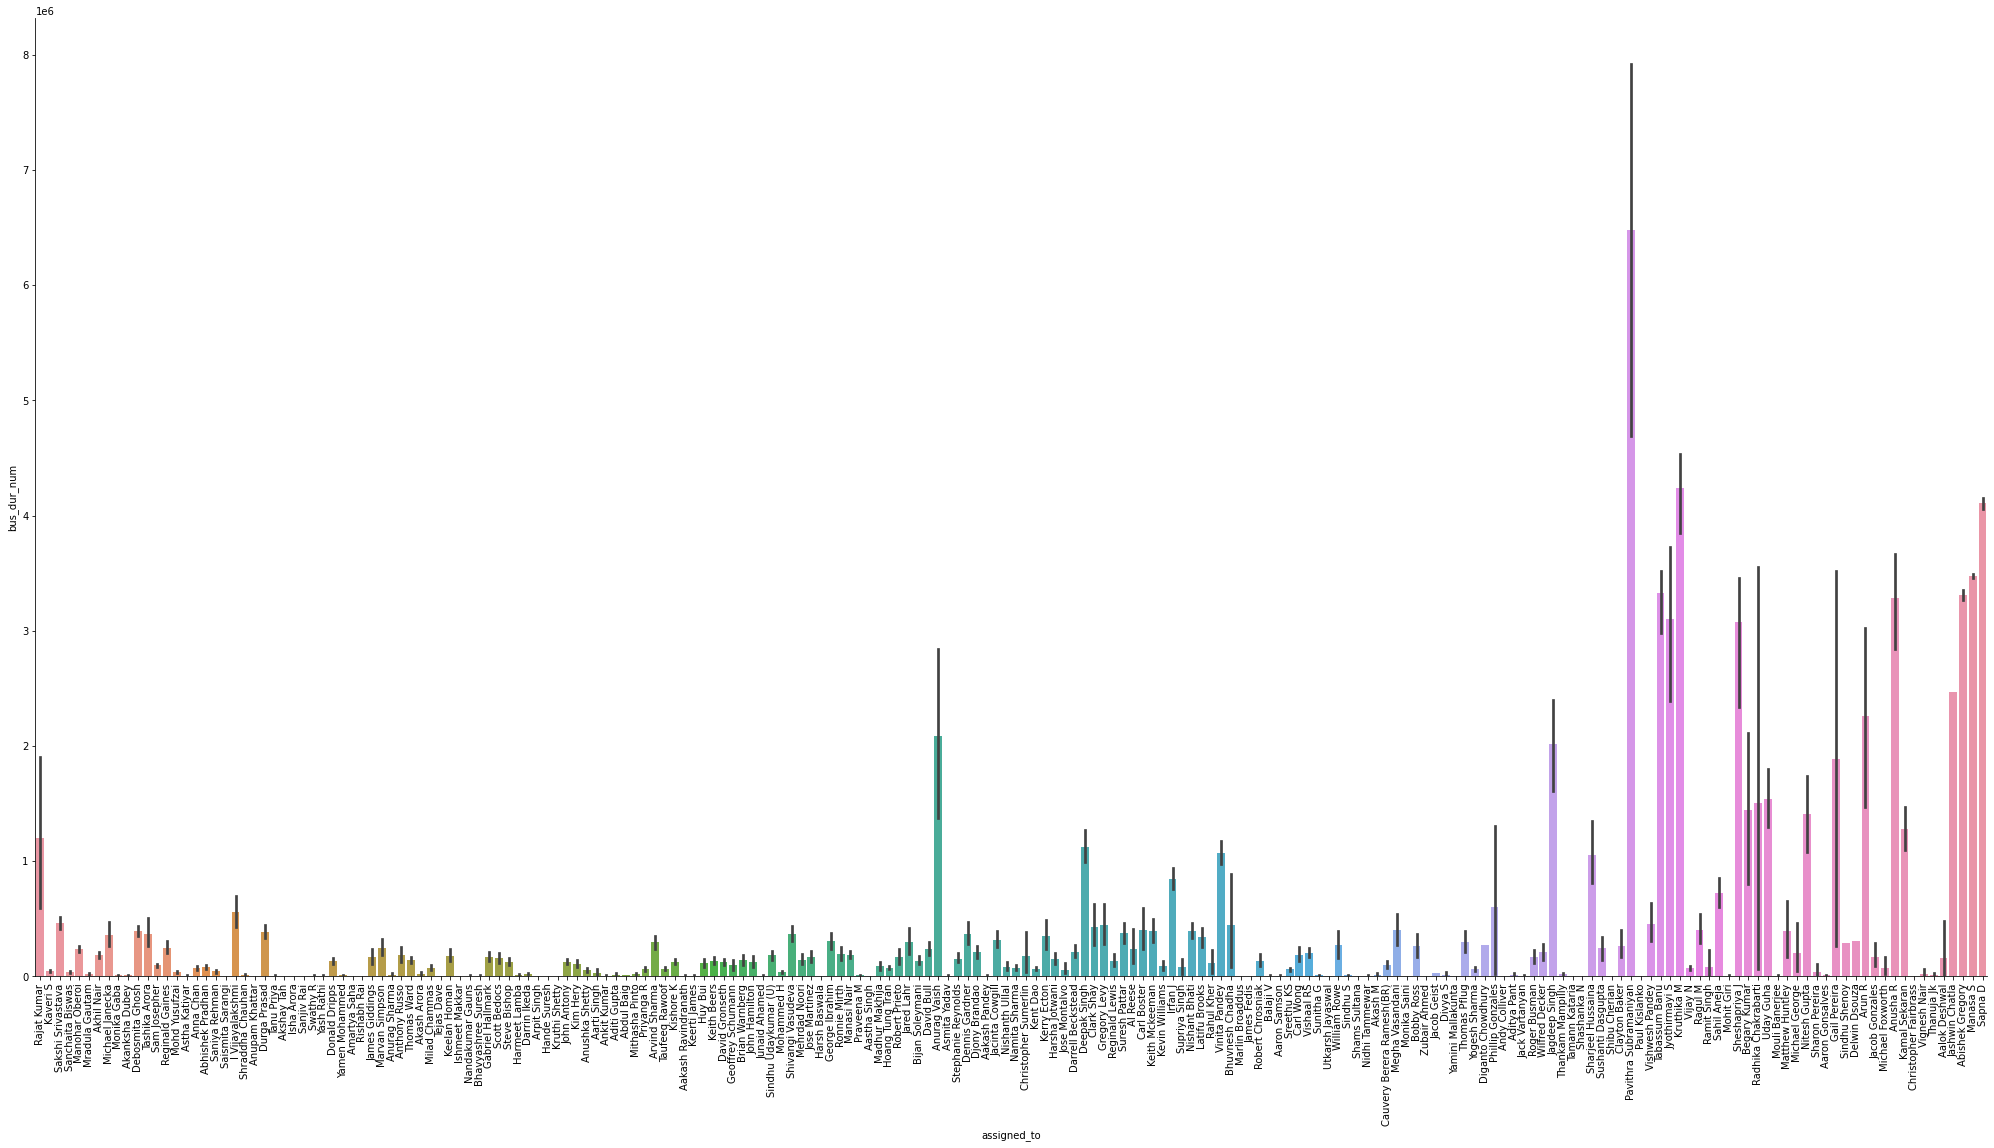

In [ ]:
a_tech = sns.catplot(x="assigned_to", y="bus_dur_num", kind="bar", data=a_Data, size=14, aspect = 2)
a_tech.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


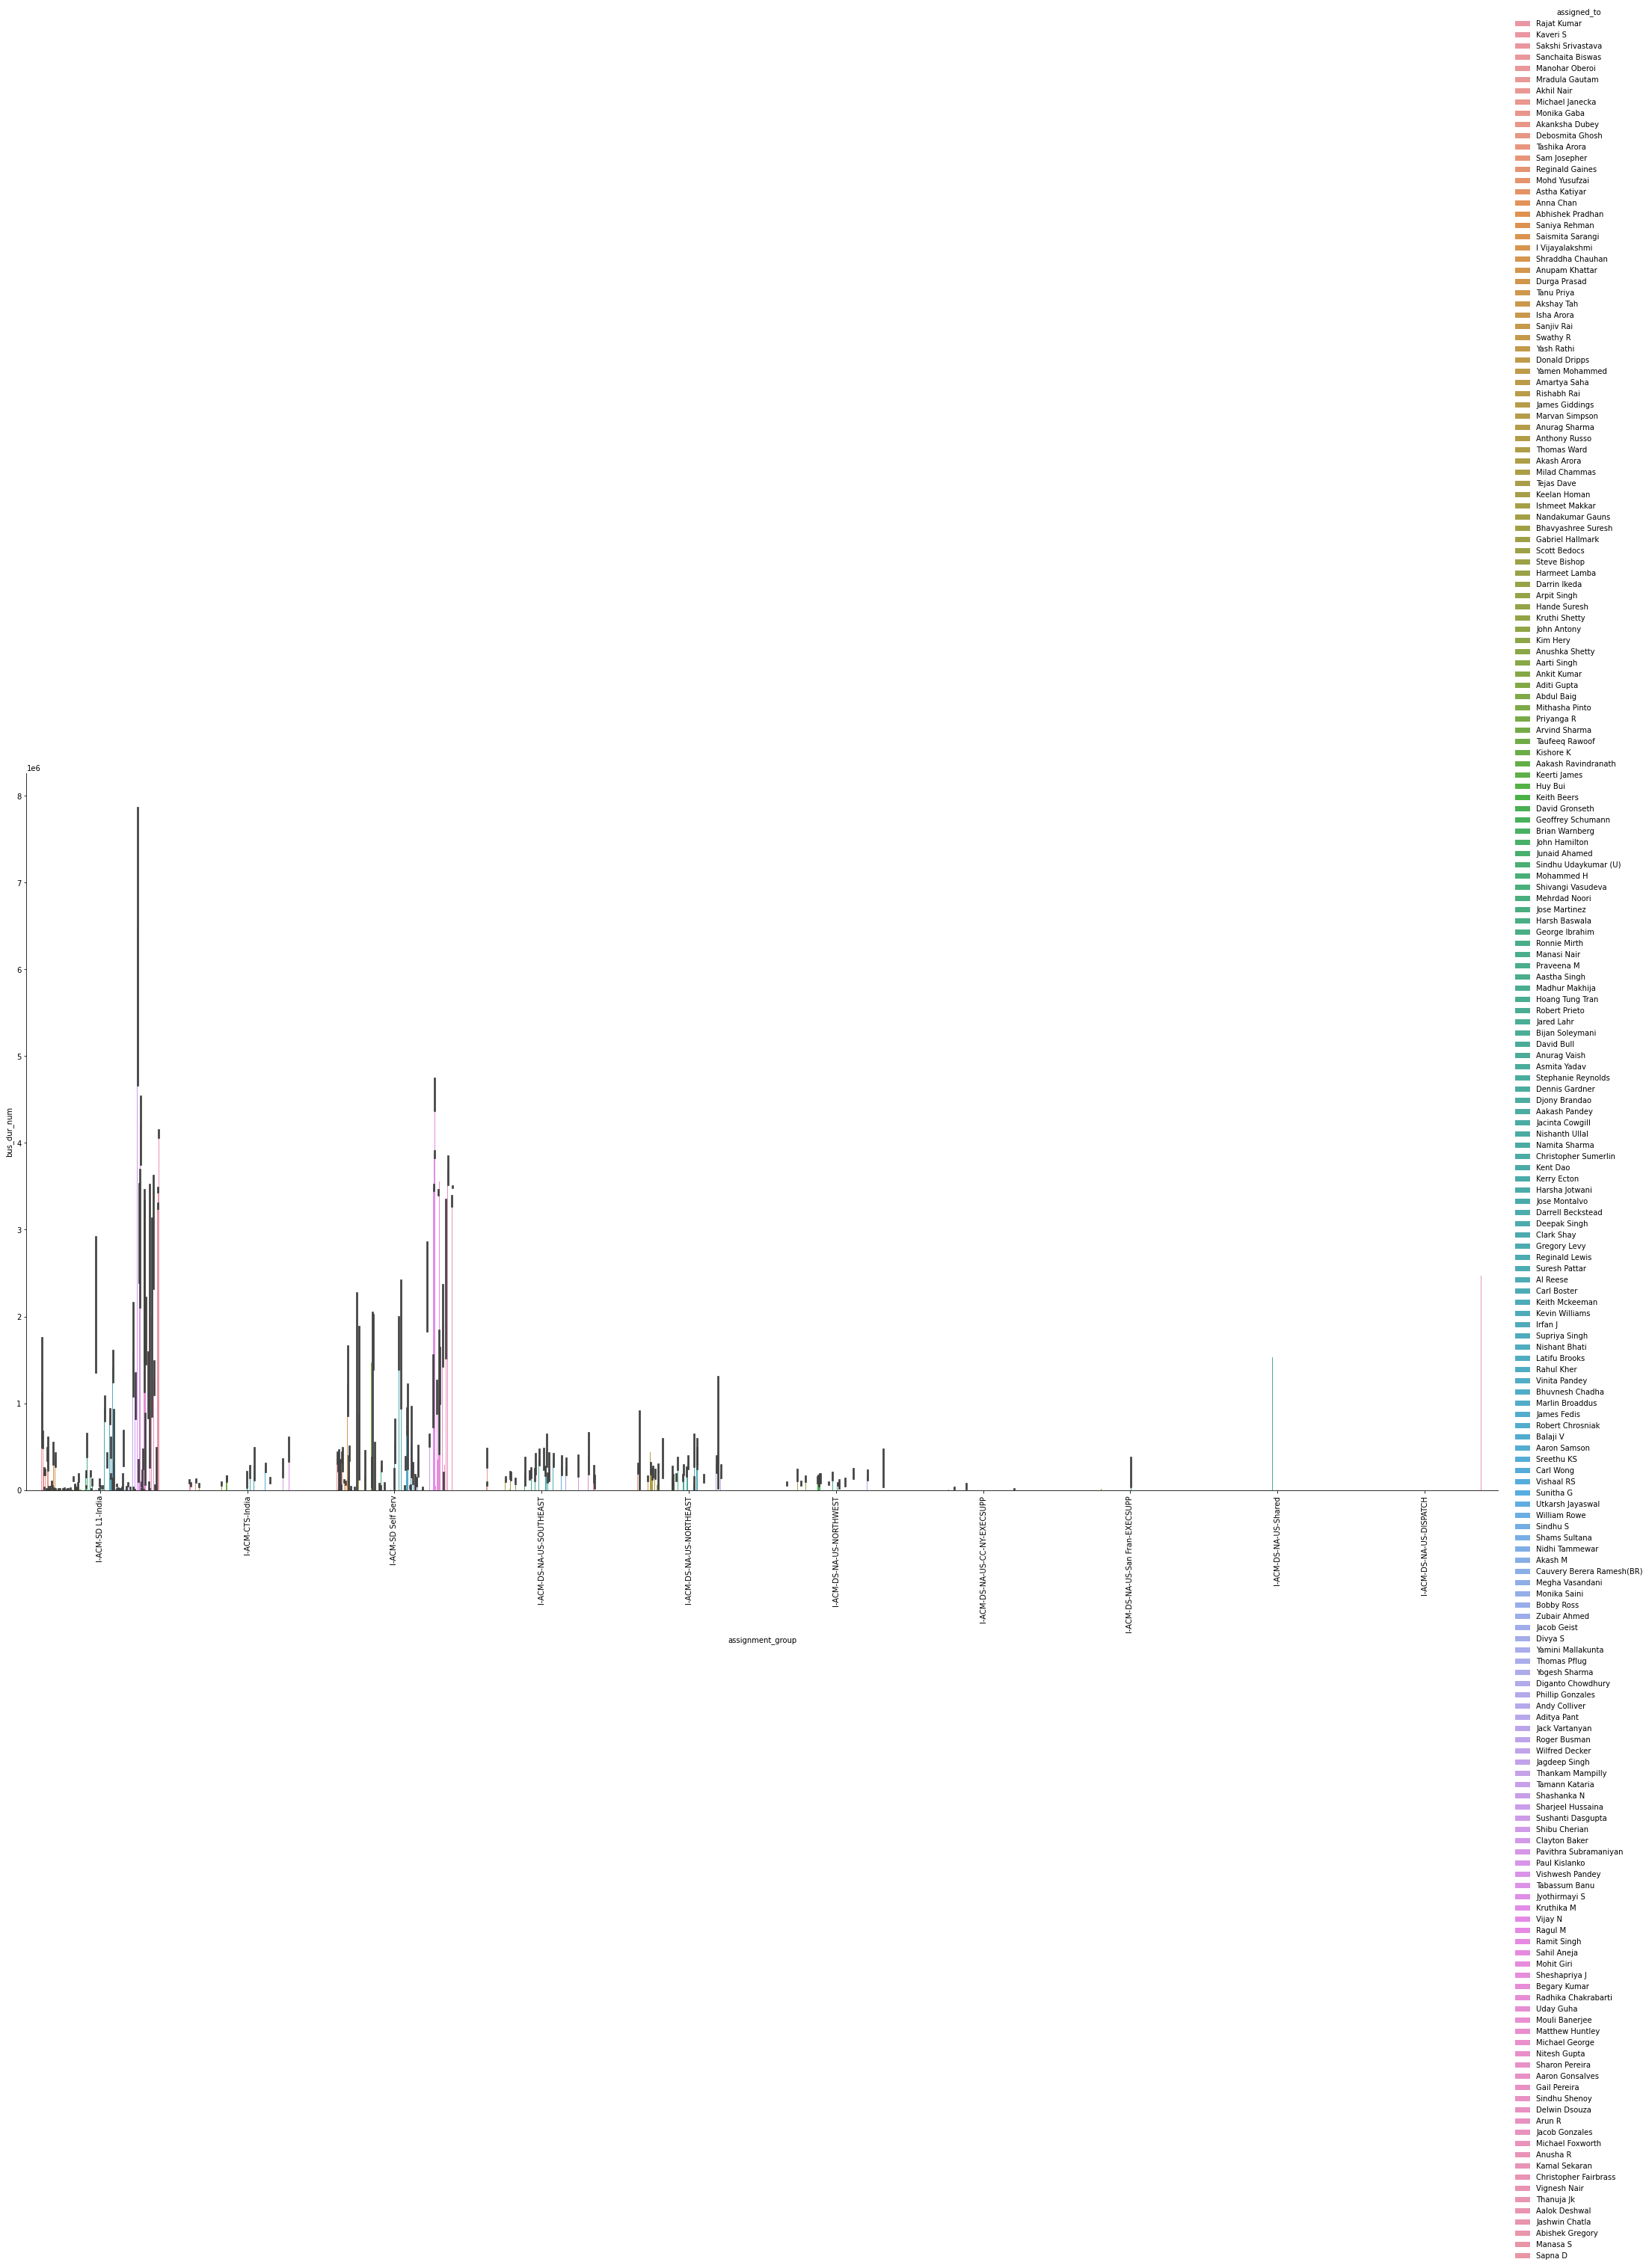

In [ ]:
a_tech_assign = sns.catplot(x="assignment_group", y="bus_dur_num", hue="assigned_to", kind="bar", data=a_Data, size=14, aspect = 2)
a_tech_assign.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


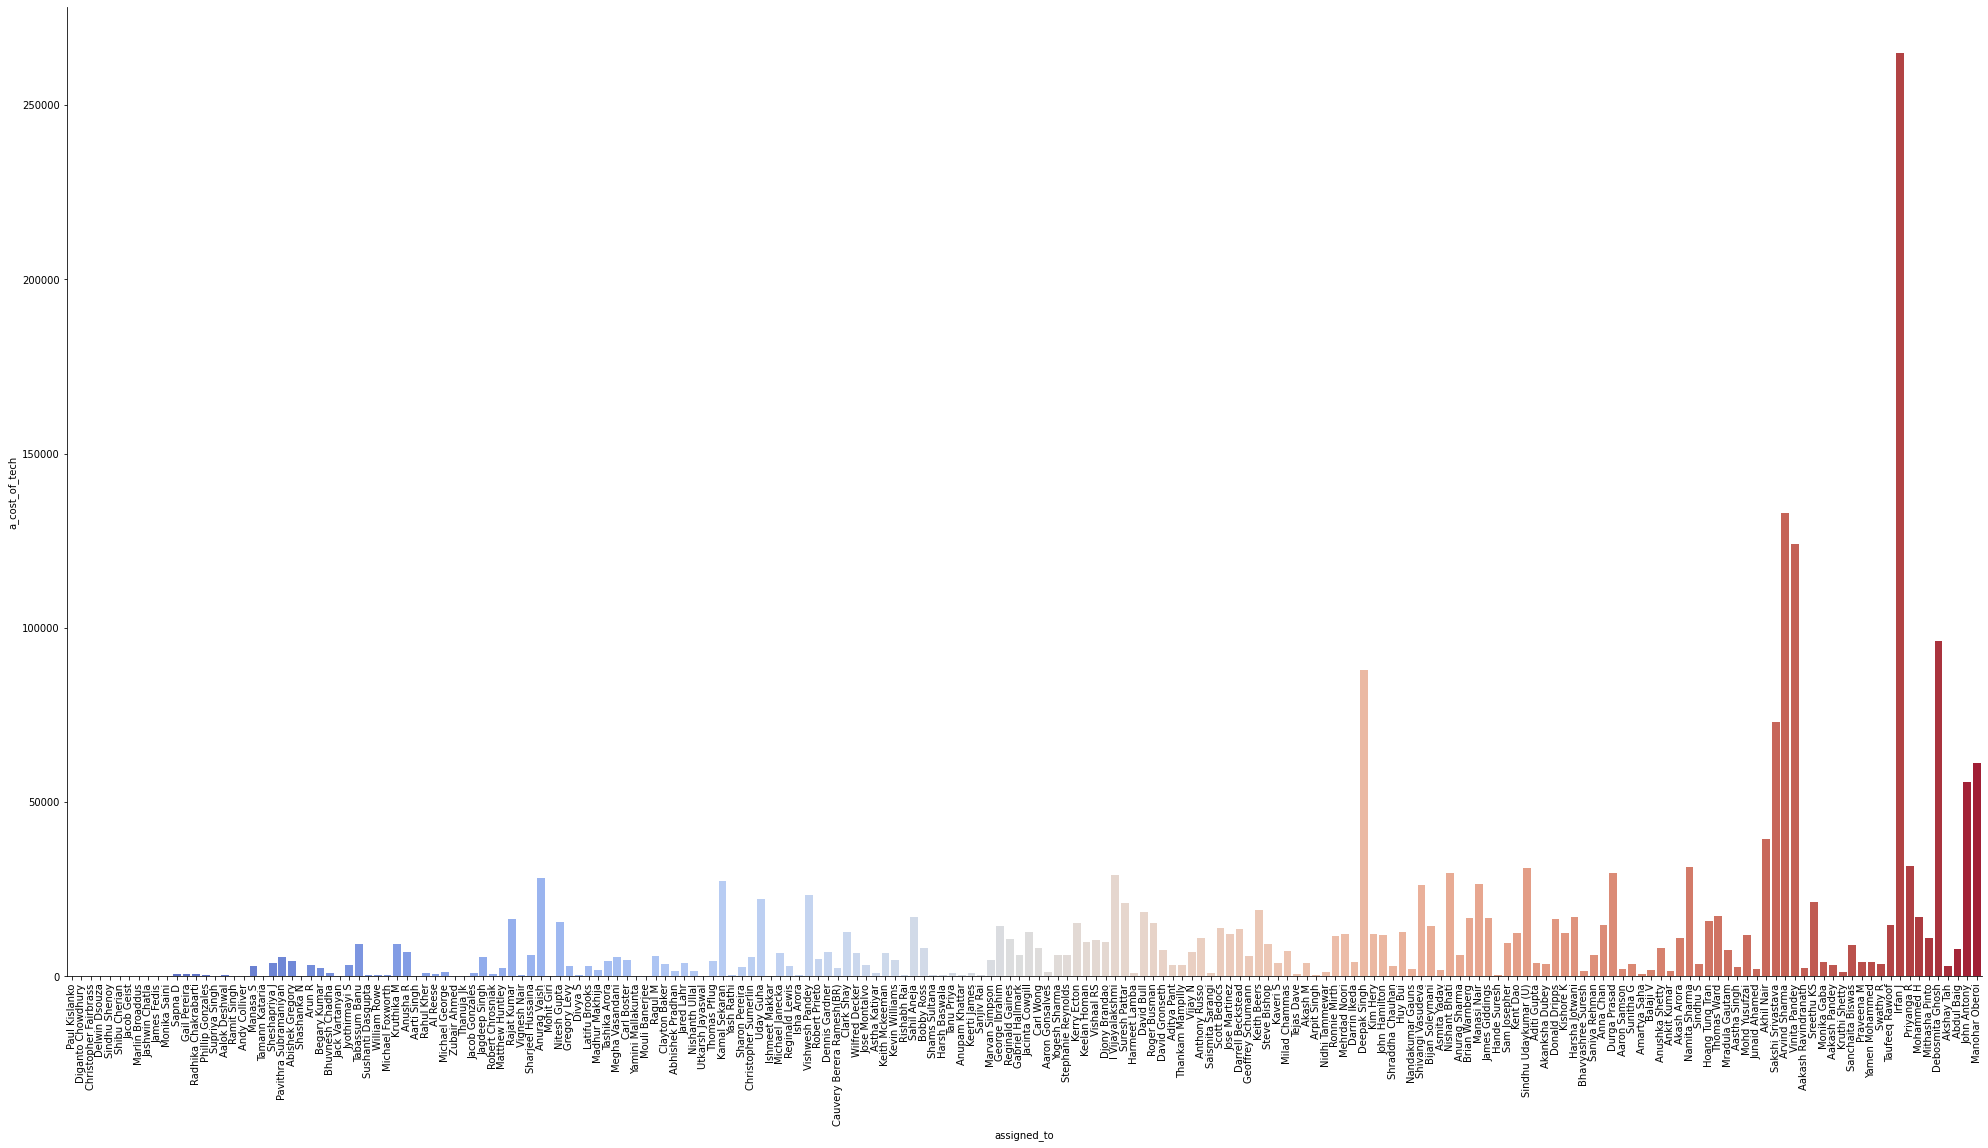

In [ ]:
a_cost_of_tech = get_cost(a_Data)
a_Data = a_Data.sort_values(['count']).reset_index(drop=True)
a_Data['a_cost_of_tech'] = a_Data['assigned_to'].map(a_cost_of_tech)
a_Data.head()
a_cost_tech = sns.catplot(x="assigned_to", y="a_cost_of_tech", kind="bar", data=a_Data, size =14, aspect = 2, palette="coolwarm")
a_cost_tech.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


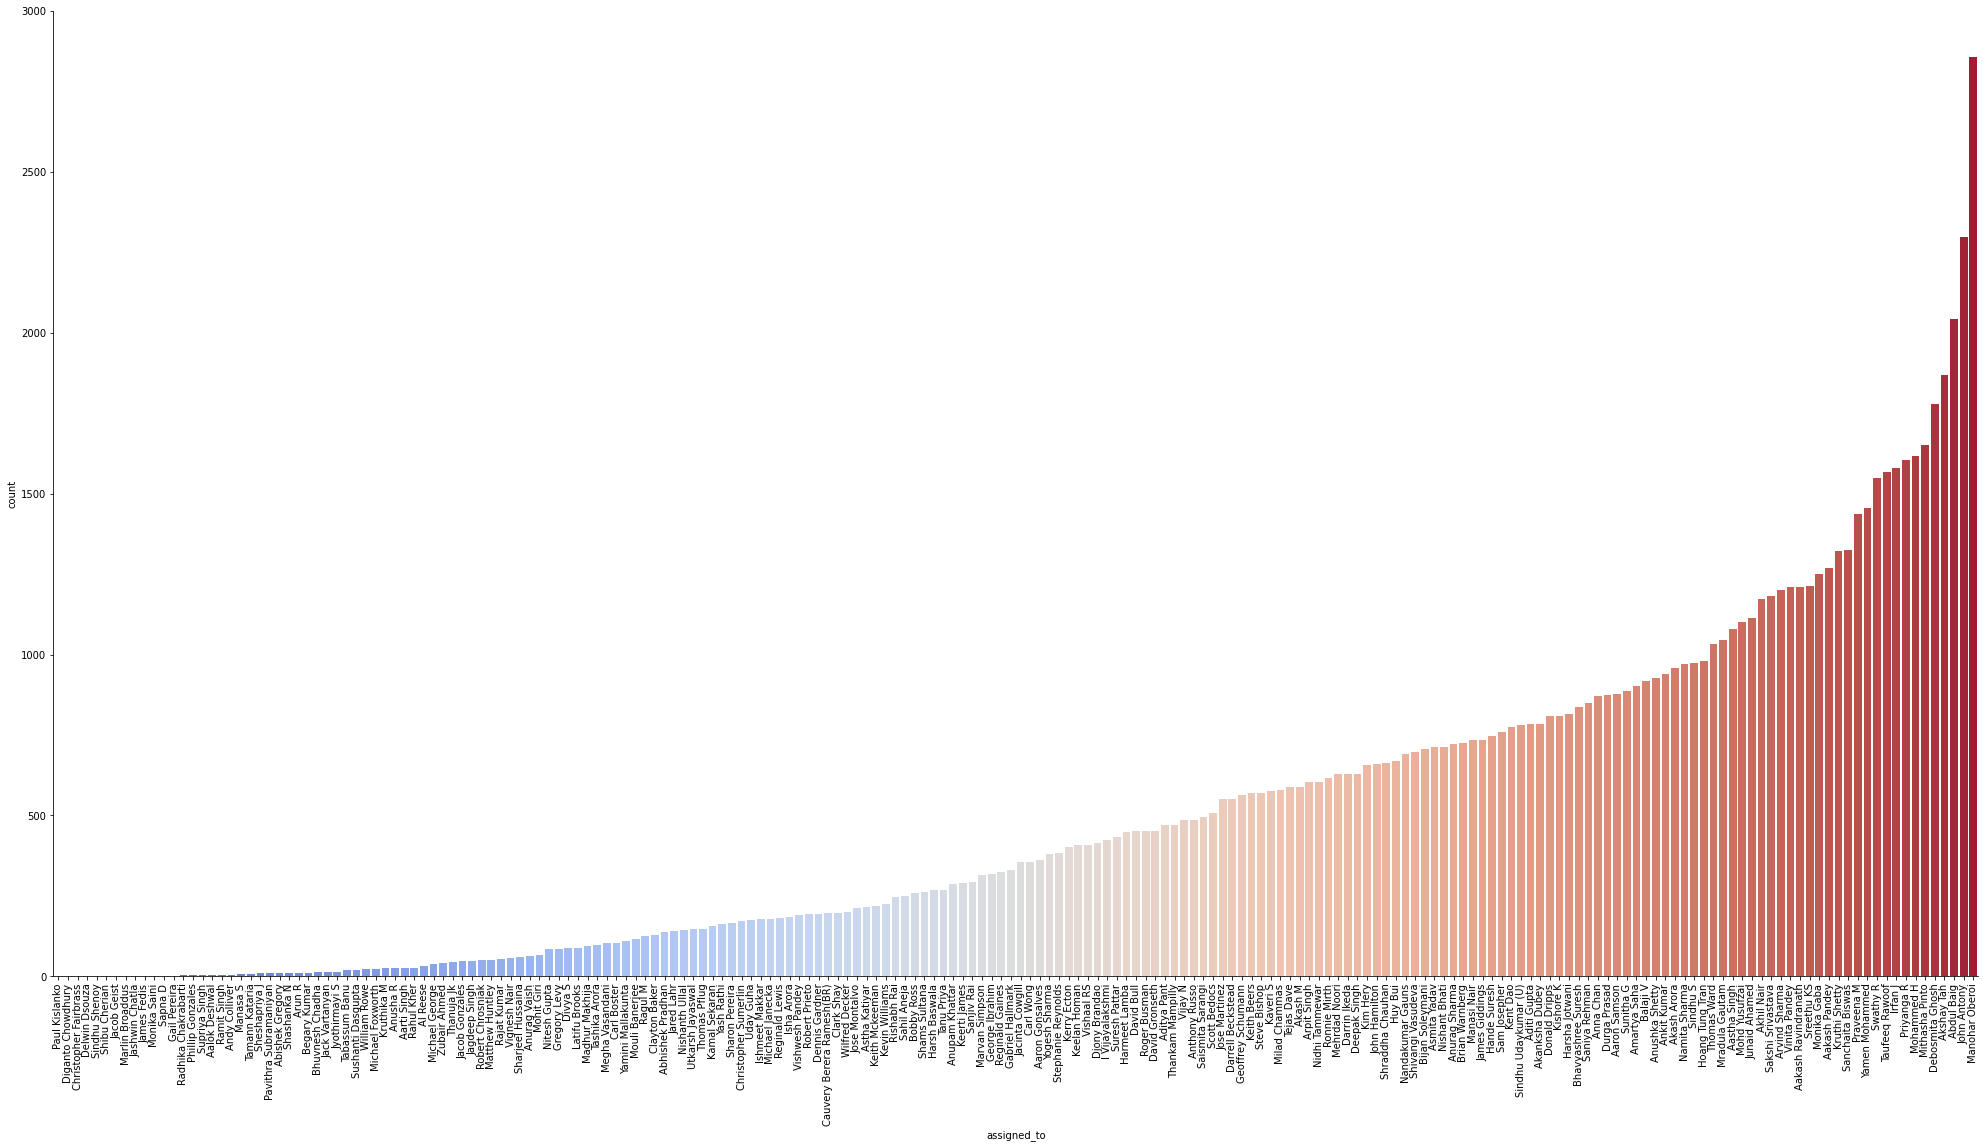

In [ ]:
a_Data.groupby(by='assigned_to').count()
a_Data['count']=a_Data.groupby(by='assigned_to')['assigned_to'].transform('count')
a_count = sns.catplot(x="assigned_to", y="count", kind="bar", data=a_Data, size =14, aspect = 2, palette="coolwarm")
a_count.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


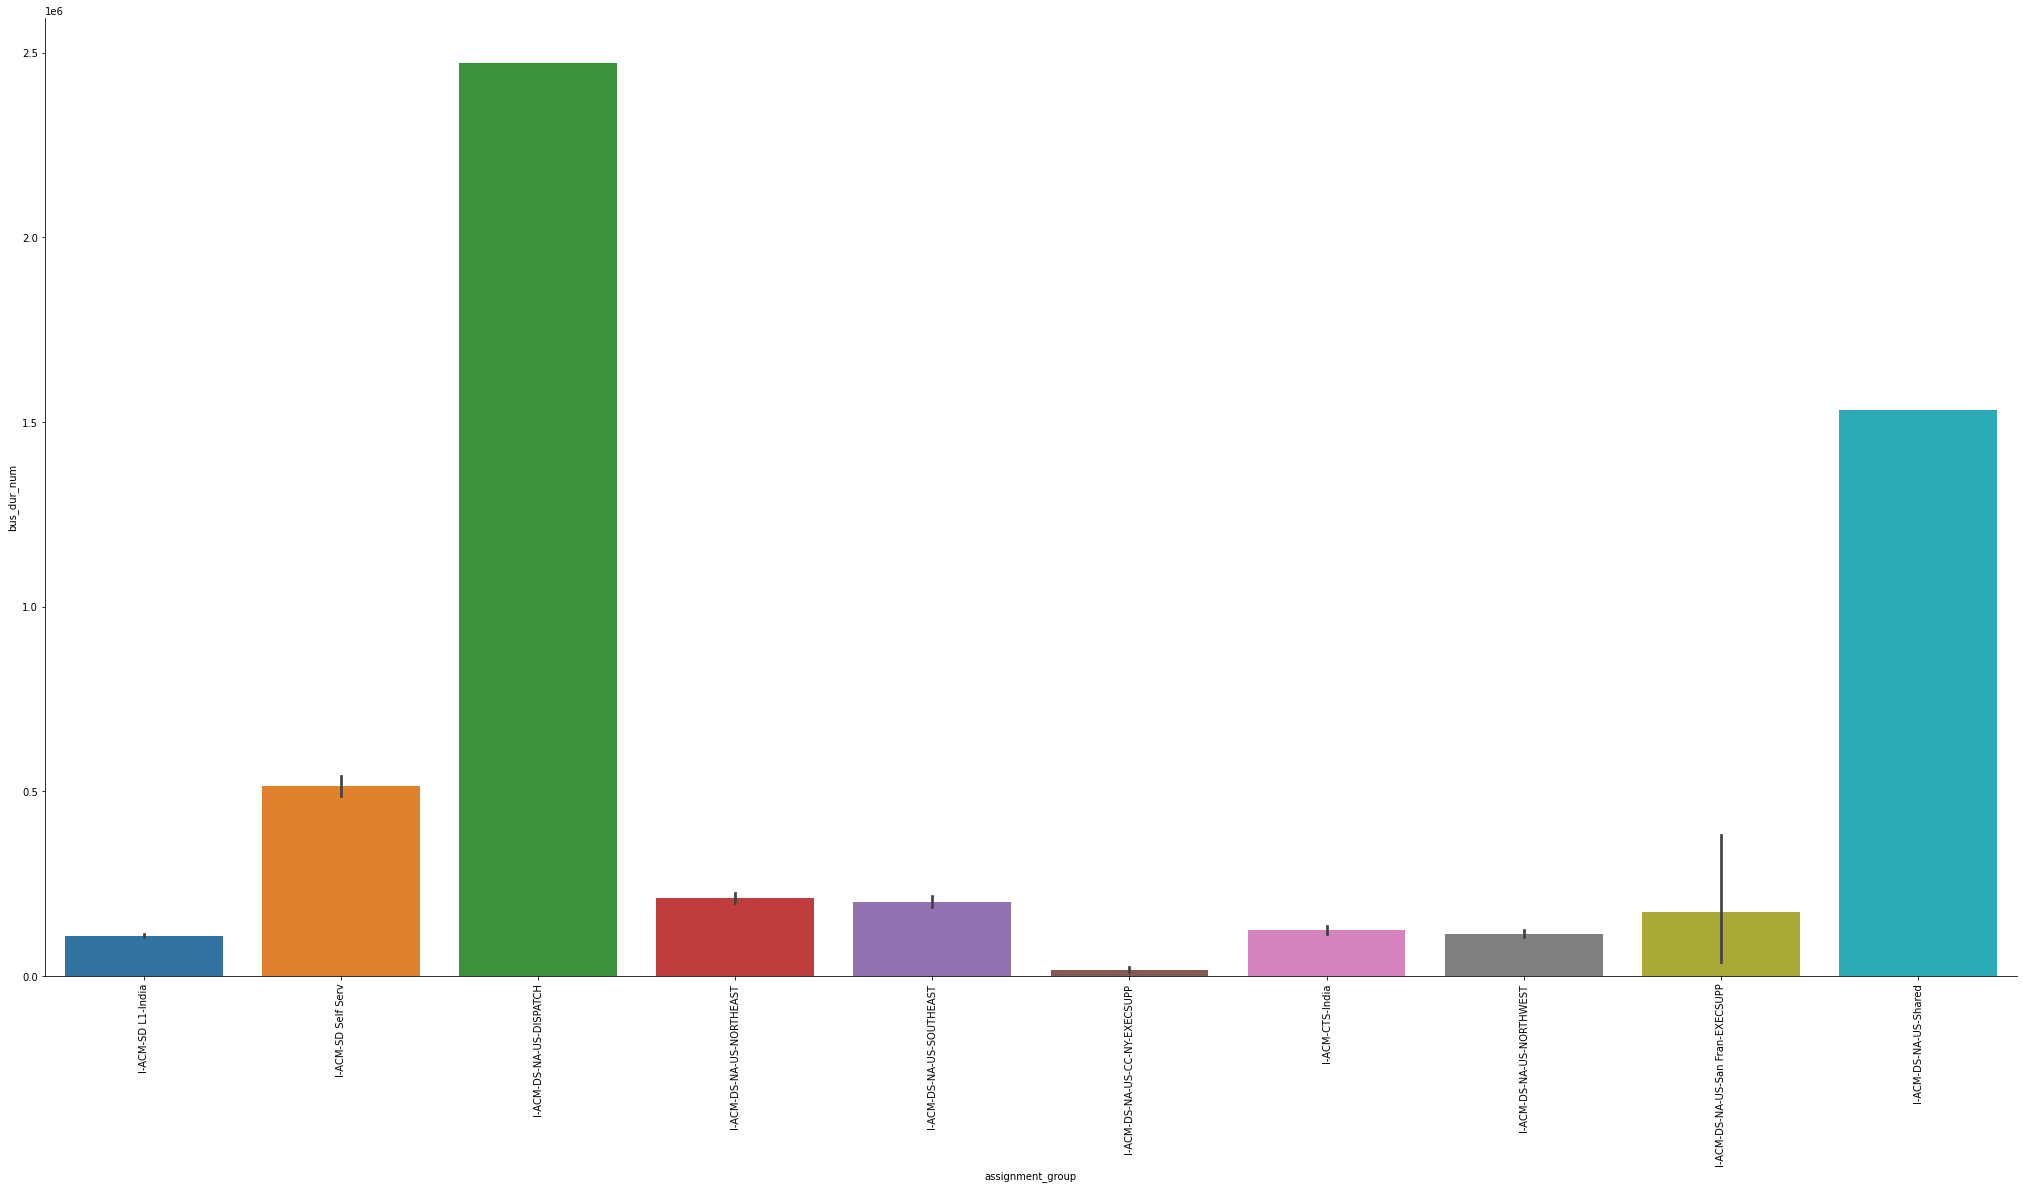

In [125]:
a_dur_assign = sns.catplot(x="assignment_group", y="bus_dur_num", kind="bar", data=a_Data, size=14, aspect = 2)
a_dur_assign.set_xticklabels(rotation=90)

In [ ]:
# J Data

j_Data = pd.read_csv('/content/gdrive/Shared drives/IST 718 Project/j_cleaned.csv')
j_Data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,7,9,10,12,14,17,18,19,24,28,29,30,32,34,35,37,38,39,41,42,44,52,53,54,55,56,57,58,59,64,66,67,68,69,71,72,73,74,75,76,77,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
0,0,INC3148753,2020-06-09 20:46:00,Closed,system,Desktop or laptop,\tI have opened laptop refresh for more than 1...,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-10 18:45:00,Accepted Resolution,0.0,pthakur,0.0,2020-06-10 15:45:00,6.0,onsite-americas,itco,P3,False,2,6,2020-06-22 03:02:00,0,2020-06-11 17:26:00,Incident,Closed,Closed Complete,3 - Low,P3,False,81659.0,False,Yes,Do not notify,False,True,"Jun 22, 2020 00:02:12 system: Incident automat...",P3,2020-06-10 15:45:00,...,False,global,2020-06-24 05:03:00,neelamvijay,2020-06-09 20:46:00,Self-service,False,False,False,False,False,False,False,Resolved,713708,6/15/2020 18:45,False,ttruong,other,1,NaN,NaN,NaN,NaN,2020-06-22 03:02:00,NaN,NaN,NaN,1 days 20:40:00,NaN,NaN,NaN,2:59:54,2:59:54,18:58:54,22:40:59,0:00:00,"12 days, 6:15:17","8 days, 6:15:08",2020-06-22 00:02:12
1,1,INC2960955,2020-02-04 07:46:00,Closed,system,Easy connect,I can't seem to connect via Pulse anymore with...,"Westford, MA",ONSITE-AMERICAS,2020-02-04 09:55:00,Accepted Resolution,0.0,talmquist,0.0,2020-02-04 07:47:00,6.0,onsite-americas,onsite-americas,P3,False,2,4,2020-02-15 03:03:00,0,2020-02-04 14:18:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Feb 15, 2020 00:03:26 system: Incident automat...",P3,2020-02-04 07:47:00,...,False,global,2020-02-19 13:28:00,talmquist,2020-02-04 07:47:00,Incident Form,False,False,False,False,False,False,False,Resolved,735188,UNKNOWN,False,ccoffee,report an issue,0,NaN,NaN,NaN,NaN,2020-02-15 03:03:00,NaN,NaN,NaN,0 days 06:32:00,NaN,NaN,NaN,6:30:39,2:07:36,0:00:00,0:00:00,0:00:00,"10 days, 19:16:42","8 days, 12:13:08",2020-02-15 00:03:26
2,2,INC3131802,2020-05-27 11:06:00,Closed,system,Desktop or laptop,""" i"" key not working : virtual keyboard works...","Houston, TX",ONSITE-AMERICAS,2020-05-27 12:43:00,Accepted Resolution,0.0,pthakur,0.0,2020-05-27 12:27:00,4.0,onsite-americas,onsite-americas,P3,False,2,6,2020-06-07 03:02:00,2,2020-06-07 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,915534.0,False,Yes,Do not notify,False,True,"Jun 07, 2020 00:02:12 system: Incident automat...",P3,2020-05-27 12:27:00,...,False,global,2020-06-10 18:23:00,pthakur,2020-05-27 12:27:00,Incident Form,False,False,False,False,False,False,False,Cancelled,636783,6/6/2020 12:43,False,tdefranco,desktop / laptop hardware issue,0,NaN,NaN,NaN,NaN,2020-06-07 03:02:00,NaN,NaN,NaN,10 days 15:56:00,NaN,NaN,NaN,0:16:05,0:16:05,0:00:00,"10 days, 14:18:54",0:00:00,"10 days, 15:55:21","7 days, 8:53:03",2020-06-07 00:02:12
3,3,INC3245966,2020-09-07 03:46:00,Closed,system,Desktop or laptop,add Dell 7010 and Lenovo M910 image to the SCC...,"Taikoo Shing,

In [ ]:
j_Data['assigned_to'].nunique()
j_Data = j_Data[j_Data.assigned_to != 'nan']
j_Data = j_Data[j_Data.assigned_to != 'vivekumar']

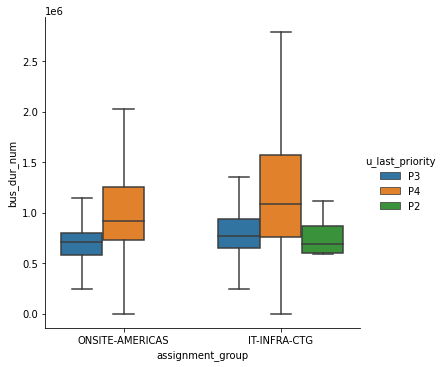

In [ ]:
# By priority
sns.catplot(x="assignment_group", y="bus_dur_num", hue="u_last_priority", kind="box", data=j_Data, showfliers=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


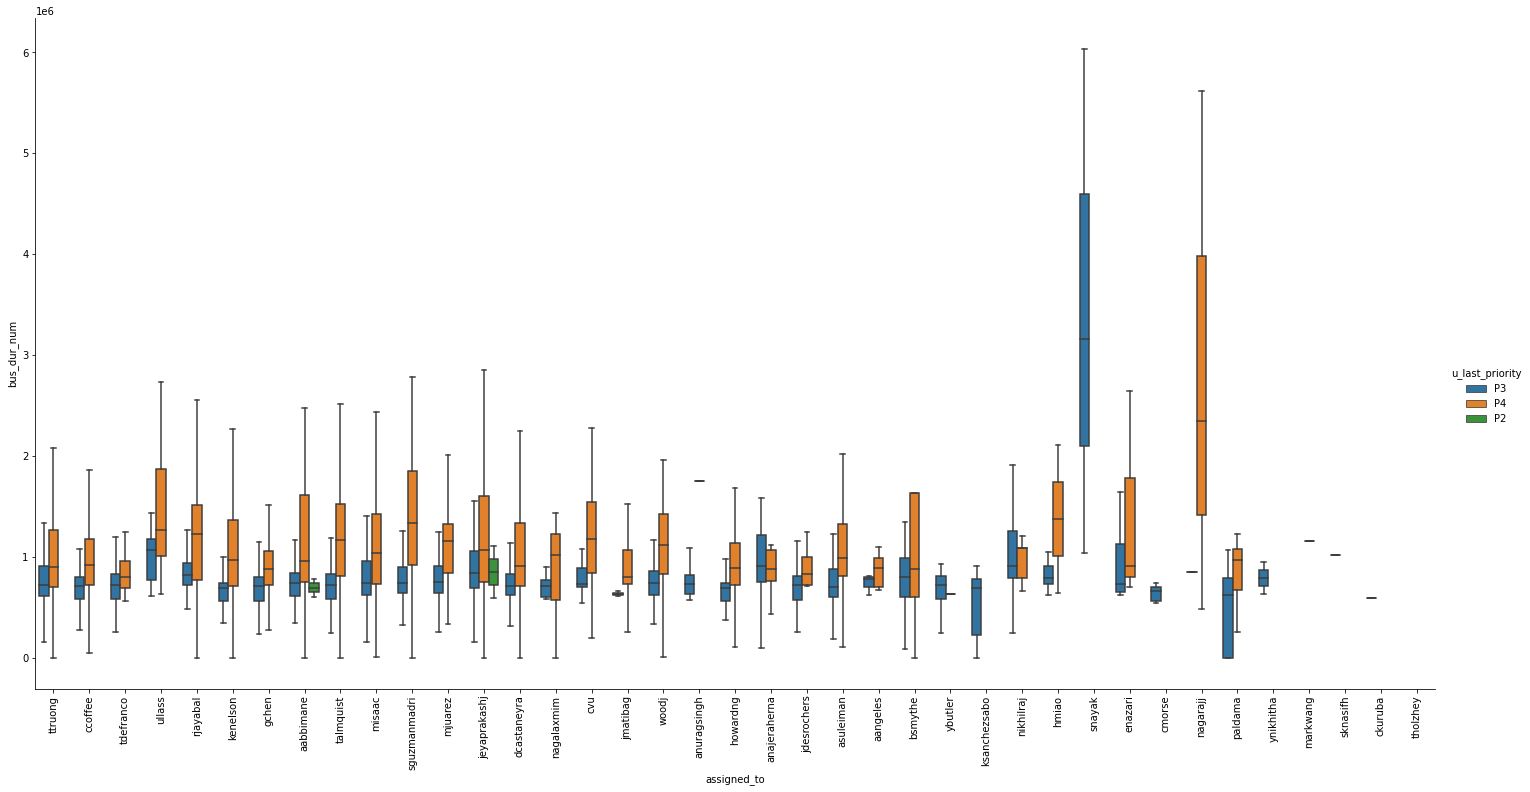

In [ ]:
j_prio = sns.catplot(x="assigned_to", y="bus_dur_num", hue="u_last_priority", kind="box", data=j_Data, size =10, aspect = 2, showfliers=False)
j_prio.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


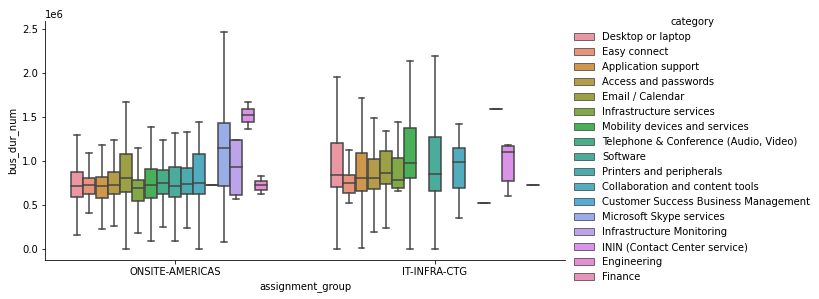

In [ ]:
# By ticket type
sns.catplot(x="assignment_group", y="bus_dur_num", hue="category", kind="box", data=j_Data, size =4, aspect = 2, showfliers=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


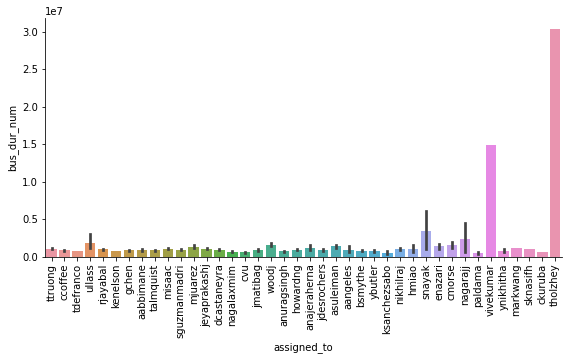

In [ ]:
j_tech = sns.catplot(x="assigned_to", y="bus_dur_num", kind="bar", data=j_Data, size =4, aspect = 2)
j_tech.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


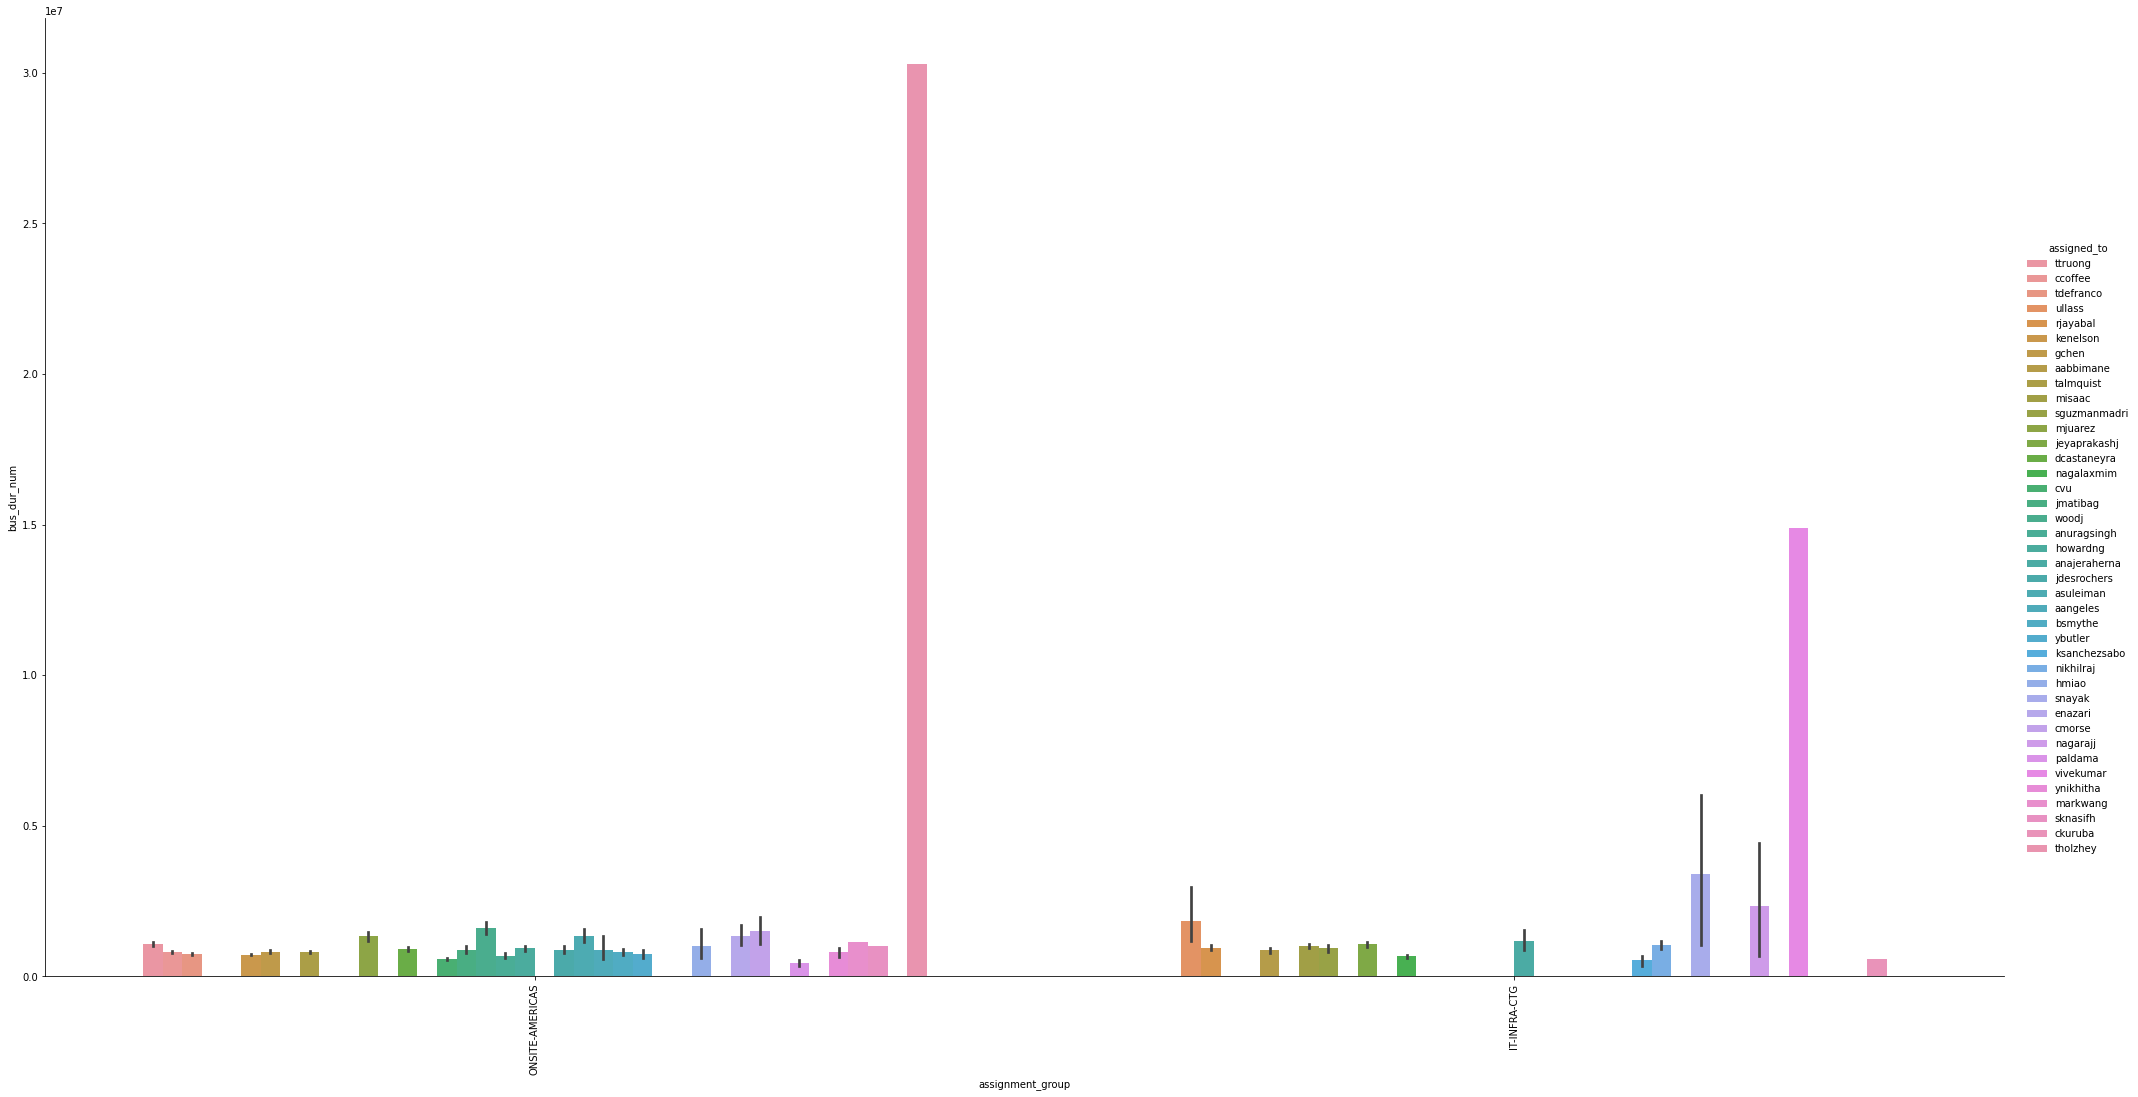

In [ ]:
j_tech_assign = sns.catplot(x="assignment_group", y="bus_dur_num", hue="assigned_to", kind="bar", data=j_Data, size=14, aspect = 2)
j_tech_assign.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


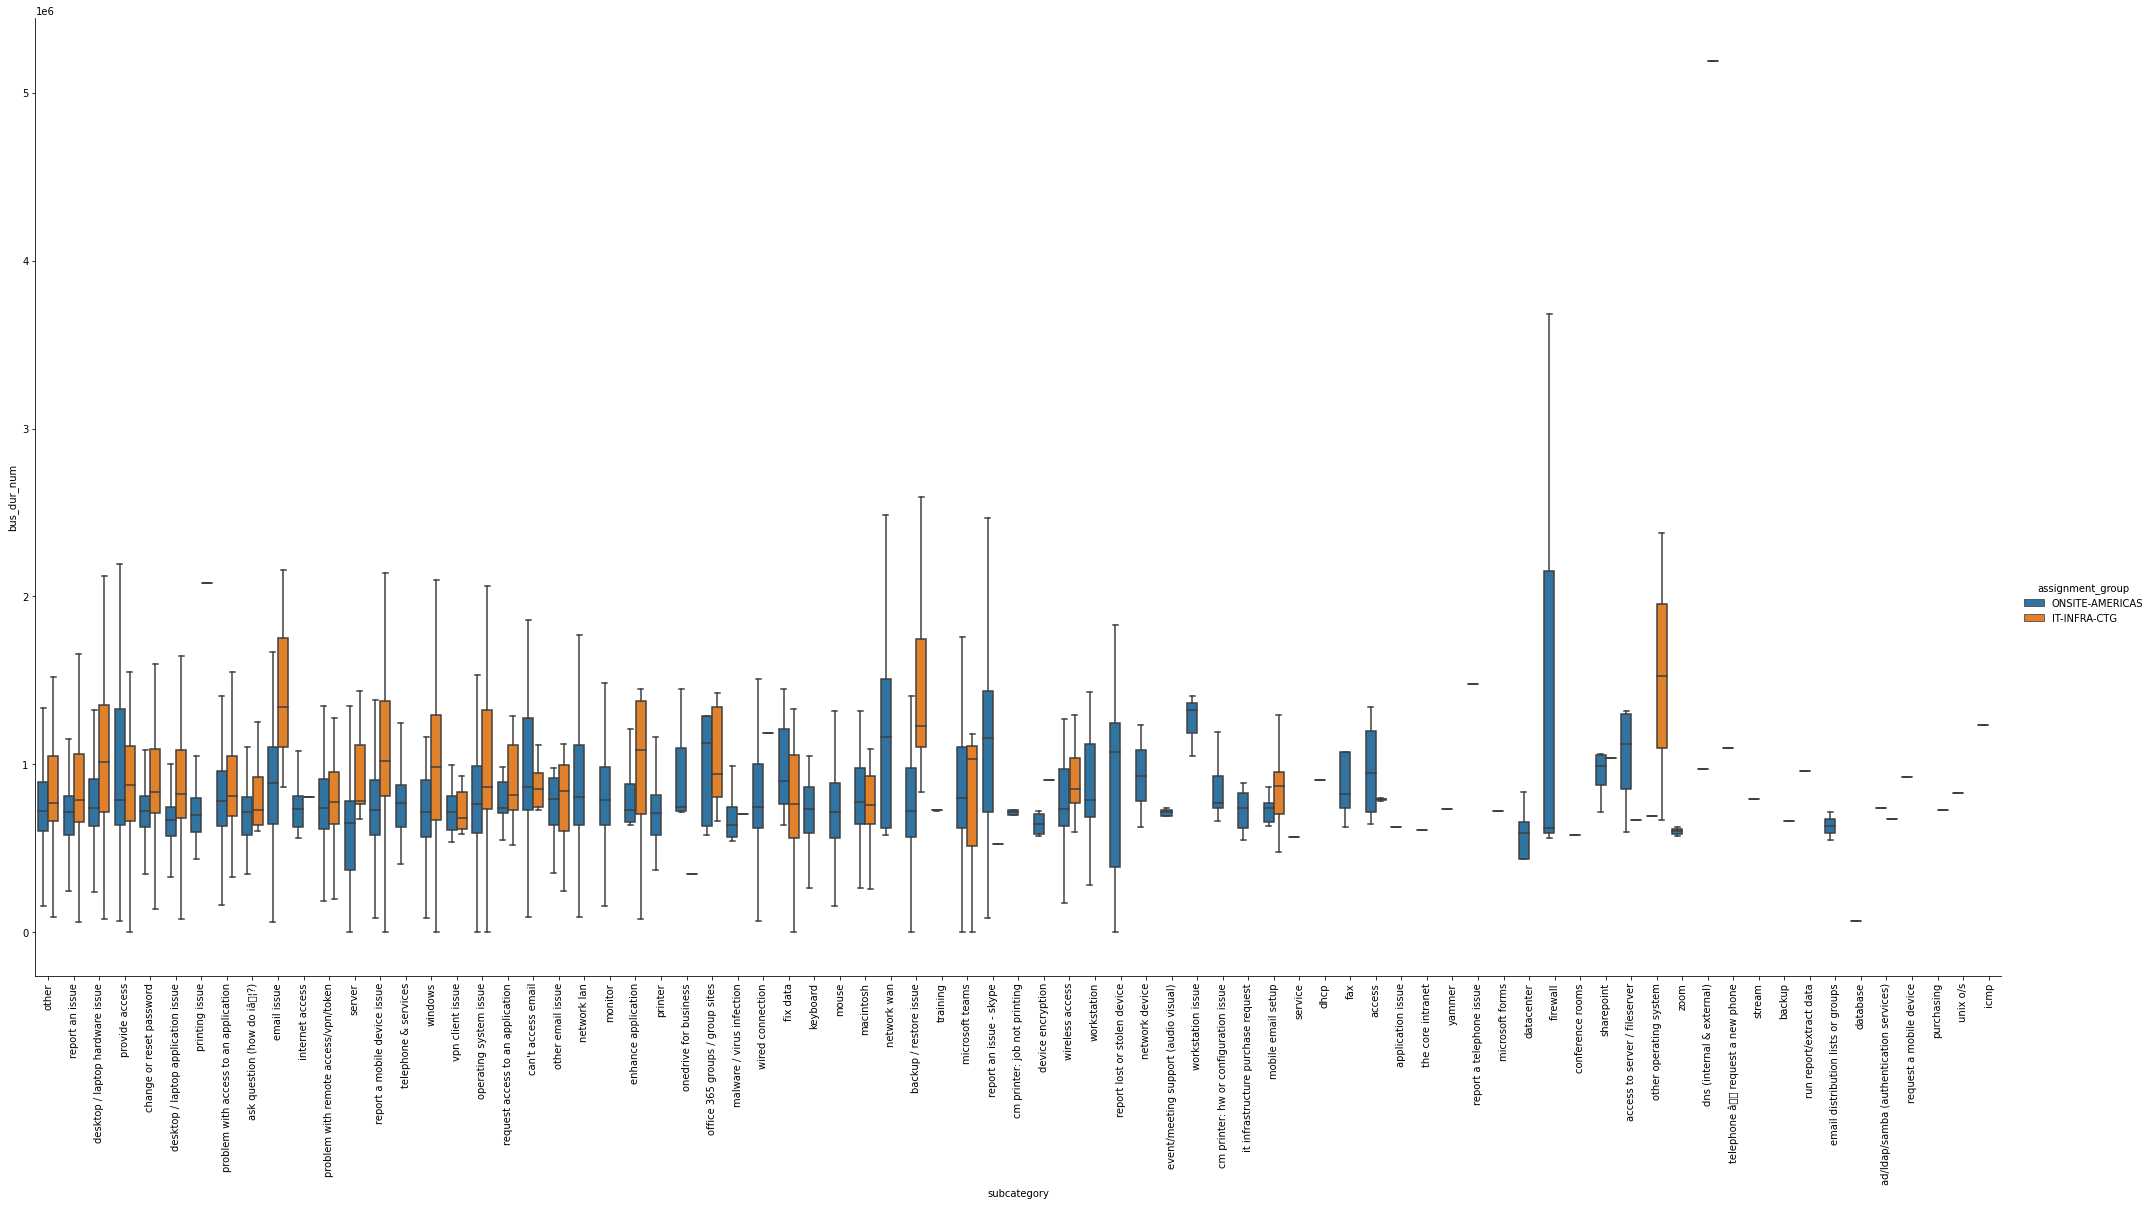

In [ ]:
# By subcategory
sub_assign = sns.catplot(x="subcategory", y="bus_dur_num", hue="assignment_group", kind="box", data=j_Data, size=14, aspect = 2, showfliers=False)
sub_assign.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


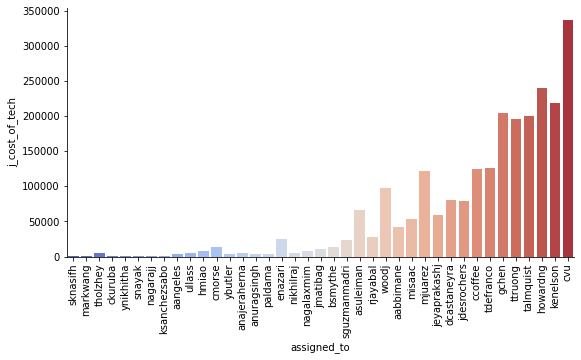

In [ ]:
j_cost_of_tech = get_cost(j_Data)
j_Data['j_cost_of_tech'] = j_Data['assigned_to'].map(j_cost_of_tech)
j_Data.head()
j_cost_tech = sns.catplot(x="assigned_to", y="j_cost_of_tech", kind="bar", data=j_Data, size =4, aspect = 2, palette="coolwarm")
j_cost_tech.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


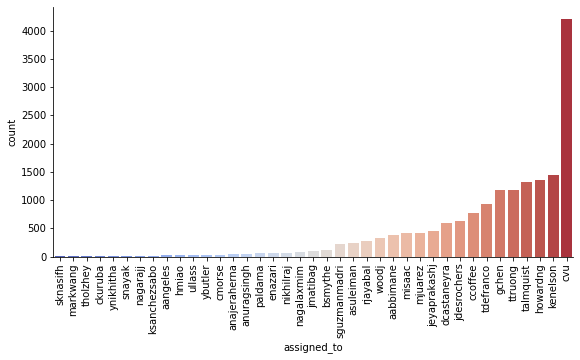

In [ ]:
j_Data.groupby(by='assigned_to').count()
j_Data['count']=j_Data.groupby(by='assigned_to')['assigned_to'].transform('count')
j_count = sns.catplot(x="assigned_to", y="count", kind="bar", data=j_Data, size =4, aspect = 2, palette="coolwarm")
j_Data = j_Data.sort_values(['count']).reset_index(drop=True)
j_count.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


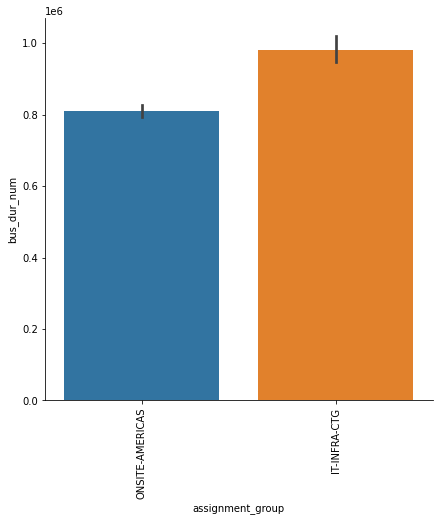

In [127]:
j_dur_assign = sns.catplot(x="assignment_group", y="bus_dur_num", kind="bar", data=j_Data, size=6)
j_dur_assign.set_xticklabels(rotation=90)